1、Multiple ensembles shown to work. Analysis of why one ensemble performs better or worse than others. 
2、Analysis of interaction between hyperparameters and ensemble composition. 
3、Analysis of interaction between training/validation/testing and ensembles and hyperparameters. 
4、ROC created and all models/ensembles plotted on the same graph. ROC index calculated.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [6]:
# load datasets
def load_data(file):
    df_data = pd.read_csv(file)
    df_data.replace(['?'],[0], inplace =True)
    df_data.fillna(0, inplace =True)
    return df_data

df_data1 = load_data('ozone_onehr.csv')
df_data2 = load_data('ozone_eighthr.csv')

In [7]:
# training testing split, positive data is little, so just split dataset into two part.
def data_split(df_data, alpha):
    X_train, X_test, y_train, y_test = train_test_split(\
                            df_data.iloc[:, 1:-1].values, 
                            df_data.iloc[:, -1].values, 
                            test_size=alpha, 
                            random_state=42)
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = data_split(df_data1, 0.4)

In [38]:
# define model
clf1 = XGBClassifier(max_depth=3, 
                     learning_rate=0.1, 
                     n_estimators=100, 
                     verbosity=1, 
                     objective='binary:logistic', 
                     booster='gbtree', 
                     tree_method='auto', 
                     n_jobs=4, 
                     )

clf2 = RandomForestClassifier(n_estimators=100,
                              criterion='gini',
                              max_depth=None, 
                              max_features='auto', 
                              min_samples_leaf=1, 
                              min_samples_split=2,
                              min_weight_fraction_leaf=0.0, 
                              n_jobs=4)

# 1) Multiple ensembles shown to work. Analysis of why one ensemble performs better or worse than others

In [36]:
# train model
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

# predict
y_pre1 = clf1.predict_proba(X_test)[:, 1]
y_pre2 = clf2.predict_proba(X_test)[:, 1]

# calculate ROC index 
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pre1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pre2)

ROC_index_XGB = [(i,j) for i,j in zip(fpr1, tpr1)]
print("ROC_index of XGB is:\n", ROC_index_XGB)

ROC_index_RF = [(i,j) for i,j in zip(fpr2, tpr2)]
print("ROC_index of RF is:\n", ROC_index_RF)

ROC_index of XGB is:
 [(0.0, 0.0), (0.0, 0.04), (0.00202020202020202, 0.04), (0.00202020202020202, 0.08), (0.005050505050505051, 0.08), (0.005050505050505051, 0.12), (0.007070707070707071, 0.12), (0.007070707070707071, 0.16), (0.00909090909090909, 0.16), (0.00909090909090909, 0.2), (0.010101010101010102, 0.2), (0.010101010101010102, 0.28), (0.013131313131313131, 0.28), (0.013131313131313131, 0.32), (0.01919191919191919, 0.32), (0.01919191919191919, 0.36), (0.022222222222222223, 0.36), (0.022222222222222223, 0.44), (0.031313131313131314, 0.44), (0.031313131313131314, 0.48), (0.04242424242424243, 0.48), (0.04242424242424243, 0.52), (0.051515151515151514, 0.52), (0.051515151515151514, 0.56), (0.06666666666666667, 0.56), (0.06666666666666667, 0.64), (0.09292929292929293, 0.64), (0.09292929292929293, 0.76), (0.11313131313131314, 0.76), (0.11313131313131314, 0.8), (0.13737373737373737, 0.8), (0.13737373737373737, 0.84), (0.1505050505050505, 0.84), (0.1505050505050505, 0.88), (0.2282828282828

AUC of XGB is: 0.9171717171717171
AUC of RF is: 0.858040404040404


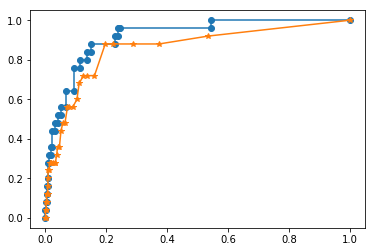

In [37]:
# calculate AUC
auc_score1 = metrics.roc_auc_score(y_test,y_pre1)
print('AUC of XGB is:', auc_score1)
auc_score2 = metrics.roc_auc_score(y_test,y_pre2)
print('AUC of RF is:',auc_score2)

# plot ROC of the models
plt.plot(fpr1, tpr1, marker = 'o', label="xgb")

plt.plot(fpr2, tpr2, marker = '*', label="RF")

plt.show()

XGB is one of boosting method, RF is one of bagging method, 

# 2) Analysis of interaction between hyperparameters and ensemble composition

In [39]:
xgb1 = XGBClassifier(max_depth=3, 
                     learning_rate=0.1, 
                     n_estimators=100, 
                     objective='binary:logistic', 
                     booster='gbtree', 
                     n_jobs=4, 
                     )

xgb2 = XGBClassifier(max_depth=5, 
                     learning_rate=0.1, 
                     n_estimators=100, 
                     objective='binary:logistic', 
                     booster='gbtree', 
                     n_jobs=4, 
                     )

xgb3 = XGBClassifier(max_depth=3, 
                     learning_rate=0.01, 
                     n_estimators=100, 
                     objective='binary:logistic', 
                     booster='gbtree', 
                     n_jobs=4, 
                     )

In [46]:
# train model
xgb1.fit(X_train, y_train)
xgb2.fit(X_train, y_train)
xgb3.fit(X_train, y_train)


# predict
y_pre1 = xgb1.predict_proba(X_test)[:, 1]
y_pre2 = xgb2.predict_proba(X_test)[:, 1]
y_pre3 = xgb3.predict_proba(X_test)[:, 1]

# calculate ROC index 
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pre1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pre2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_pre3)

ROC_index_XGB1 = [(i,j) for i,j in zip(fpr1, tpr1)]
print("ROC_index of XGB1 is:\n", ROC_index_XGB1)

ROC_index_XGB2 = [(i,j) for i,j in zip(fpr2, tpr2)]
print("ROC_index of XGB2 is:\n", ROC_index_XGB2)

ROC_index_XGB3 = [(i,j) for i,j in zip(fpr3, tpr3)]
print("ROC_index of XGB3 is:\n", ROC_index_XGB3)

ROC_index of XGB1 is:
 [(0.0, 0.0), (0.0, 0.04), (0.00202020202020202, 0.04), (0.00202020202020202, 0.08), (0.005050505050505051, 0.08), (0.005050505050505051, 0.12), (0.007070707070707071, 0.12), (0.007070707070707071, 0.16), (0.00909090909090909, 0.16), (0.00909090909090909, 0.2), (0.010101010101010102, 0.2), (0.010101010101010102, 0.28), (0.013131313131313131, 0.28), (0.013131313131313131, 0.32), (0.01919191919191919, 0.32), (0.01919191919191919, 0.36), (0.022222222222222223, 0.36), (0.022222222222222223, 0.44), (0.031313131313131314, 0.44), (0.031313131313131314, 0.48), (0.04242424242424243, 0.48), (0.04242424242424243, 0.52), (0.051515151515151514, 0.52), (0.051515151515151514, 0.56), (0.06666666666666667, 0.56), (0.06666666666666667, 0.64), (0.09292929292929293, 0.64), (0.09292929292929293, 0.76), (0.11313131313131314, 0.76), (0.11313131313131314, 0.8), (0.13737373737373737, 0.8), (0.13737373737373737, 0.84), (0.1505050505050505, 0.84), (0.1505050505050505, 0.88), (0.228282828282

AUC of XGB1 is: 0.9171717171717171
AUC of XGB2 is: 0.9052929292929293
AUC of XGB3 is: 0.8486464646464646


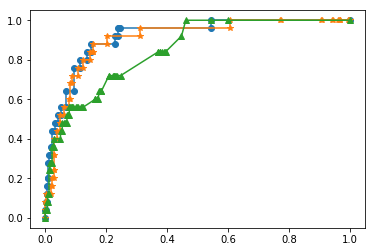

In [47]:
# calculate AUC
auc_score1 = metrics.roc_auc_score(y_test,y_pre1)
print('AUC of XGB1 is:', auc_score1)
auc_score2 = metrics.roc_auc_score(y_test,y_pre2)
print('AUC of XGB2 is:',auc_score2)
auc_score3 = metrics.roc_auc_score(y_test,y_pre3)
print('AUC of XGB3 is:',auc_score3)

# plot ROC of the models
plt.plot(fpr1, tpr1, marker = 'o')
plt.plot(fpr2, tpr2, marker = '*')
plt.plot(fpr3, tpr3, marker = '^')

plt.show()

'max_depth' in xgb1 is 3 and in xgb2 is 5, other hyperparameters are same, but xgb1's AUC is larger than xgb2's. 'learning_rate' in xgb1 is 0.1 and in xgb3 is 0.01, other hyperparameters are same, but xgb1's AUC is larger than xgb2's.

# 3) Analysis of interaction between training/validation/testing and ensembles and hyperparameters.

In [66]:
X_train1, X_test1, y_train1, y_test1 = data_split(df_data1, 0.2)
clf1 = xgb1.fit(X_train1, y_train1)

X_train2, X_test2, y_train2, y_test2 = data_split(df_data1, 0.3)
clf2 = xgb1.fit(X_train2, y_train2)

X_train3, X_test3, y_train3, y_test3 = data_split(df_data1, 0.4)
clf2 = xgb1.fit(X_train3, y_train3)

# predict
y_pre1 = clf1.predict_proba(X_test1)[:, 1]
y_pre2 = clf2.predict_proba(X_test2)[:, 1]
y_pre3 = clf2.predict_proba(X_test3)[:, 1]

# calculate ROC index 
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test1, y_pre1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, y_pre2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test3, y_pre3)

ROC_index_XGB1 = [(i,j) for i,j in zip(fpr1, tpr1)]
print("ROC_index of XGB1 is:\n", ROC_index_XGB1)

ROC_index_XGB2 = [(i,j) for i,j in zip(fpr2, tpr2)]
print("ROC_index of XGB2 is:\n", ROC_index_XGB2)

ROC_index_XGB3 = [(i,j) for i,j in zip(fpr3, tpr3)]
print("ROC_index of XGB3 is:\n", ROC_index_XGB3)

ROC_index of XGB1 is:
 [(0.0, 0.0), (0.002004008016032064, 0.0), (0.01002004008016032, 0.0), (0.01002004008016032, 0.1111111111111111), (0.014028056112224449, 0.1111111111111111), (0.014028056112224449, 0.2222222222222222), (0.02004008016032064, 0.2222222222222222), (0.02004008016032064, 0.3333333333333333), (0.06012024048096192, 0.3333333333333333), (0.06012024048096192, 0.4444444444444444), (0.07414829659318638, 0.4444444444444444), (0.07414829659318638, 0.5555555555555556), (0.09619238476953908, 0.5555555555555556), (0.09619238476953908, 0.6666666666666666), (0.14829659318637275, 0.6666666666666666), (0.14829659318637275, 0.7777777777777778), (0.23446893787575152, 0.7777777777777778), (0.23446893787575152, 0.8888888888888888), (0.23847695390781562, 0.8888888888888888), (0.24248496993987975, 0.8888888888888888), (0.5370741482965932, 0.8888888888888888), (0.5370741482965932, 1.0), (1.0, 1.0)]
ROC_index of XGB2 is:
 [(0.0, 0.0), (0.0, 0.05), (0.002699055330634278, 0.05), (0.00269905533

AUC of XGB1 is: 0.8672901358272099
AUC of XGB2 is: 0.9149122807017545
AUC of XGB3 is: 0.9171717171717171


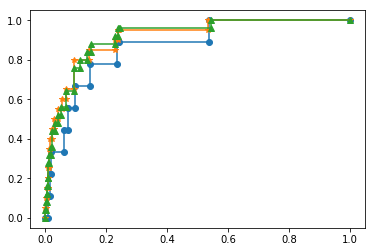

In [68]:
# calculate AUC
auc_score1 = metrics.roc_auc_score(y_test1, y_pre1)
print('AUC of XGB1 is:', auc_score1)
auc_score2 = metrics.roc_auc_score(y_test2, y_pre2)
print('AUC of XGB2 is:',auc_score2)
auc_score3 = metrics.roc_auc_score(y_test3, y_pre3)
print('AUC of XGB3 is:',auc_score3)

# plot ROC of the models
plt.plot(fpr1, tpr1, marker = 'o')
plt.plot(fpr2, tpr2, marker = '*')
plt.plot(fpr3, tpr3, marker = '^')

plt.show()

'test_size' of three dataset is 0.2, 0.3, 0.4, when I increase 'test_size', the AUC of the model is alse increase.